In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [3]:
def parse_csv_file(filename, xunit, yunit):
    data = np.loadtxt(filename, delimiter=',', usecols=(0,1))
    return np.sort(data[:,0]) * xunit, data[:,1][np.argsort(data[:,0])] * yunit

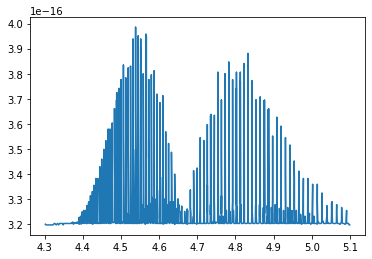

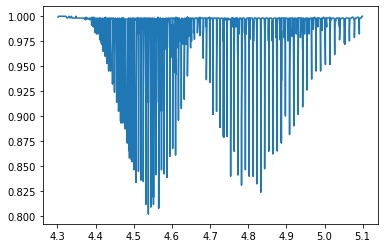

In [4]:
CO_wvs, CO_flux = \
    parse_csv_file("./template_spectra/K_CO.csv", u.micron, u.erg/u.s/u.cm**2/u.micron)
plt.figure()
plt.plot(CO_wvs, CO_flux)
plt.show()
CO_flux_corrected = (np.min(CO_flux) / CO_flux)
plt.figure()
plt.plot(CO_wvs, CO_flux_corrected)
plt.show()

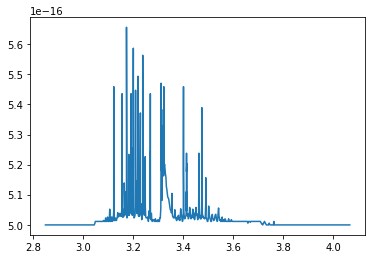

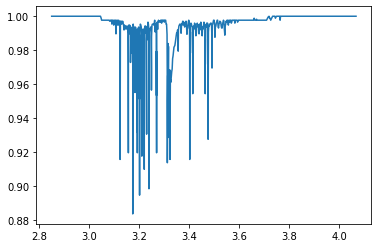

In [5]:
CH4_wvs, CH4_flux = \
    parse_csv_file("./template_spectra/K_CH4.csv", u.micron, u.erg/u.s/u.cm**2/u.micron)
plt.figure()
plt.plot(CH4_wvs, CH4_flux)
plt.show()
CH4_flux_corrected = (np.min(CH4_flux) / CH4_flux)
plt.figure()
plt.plot(CH4_wvs, CH4_flux_corrected)
plt.show()

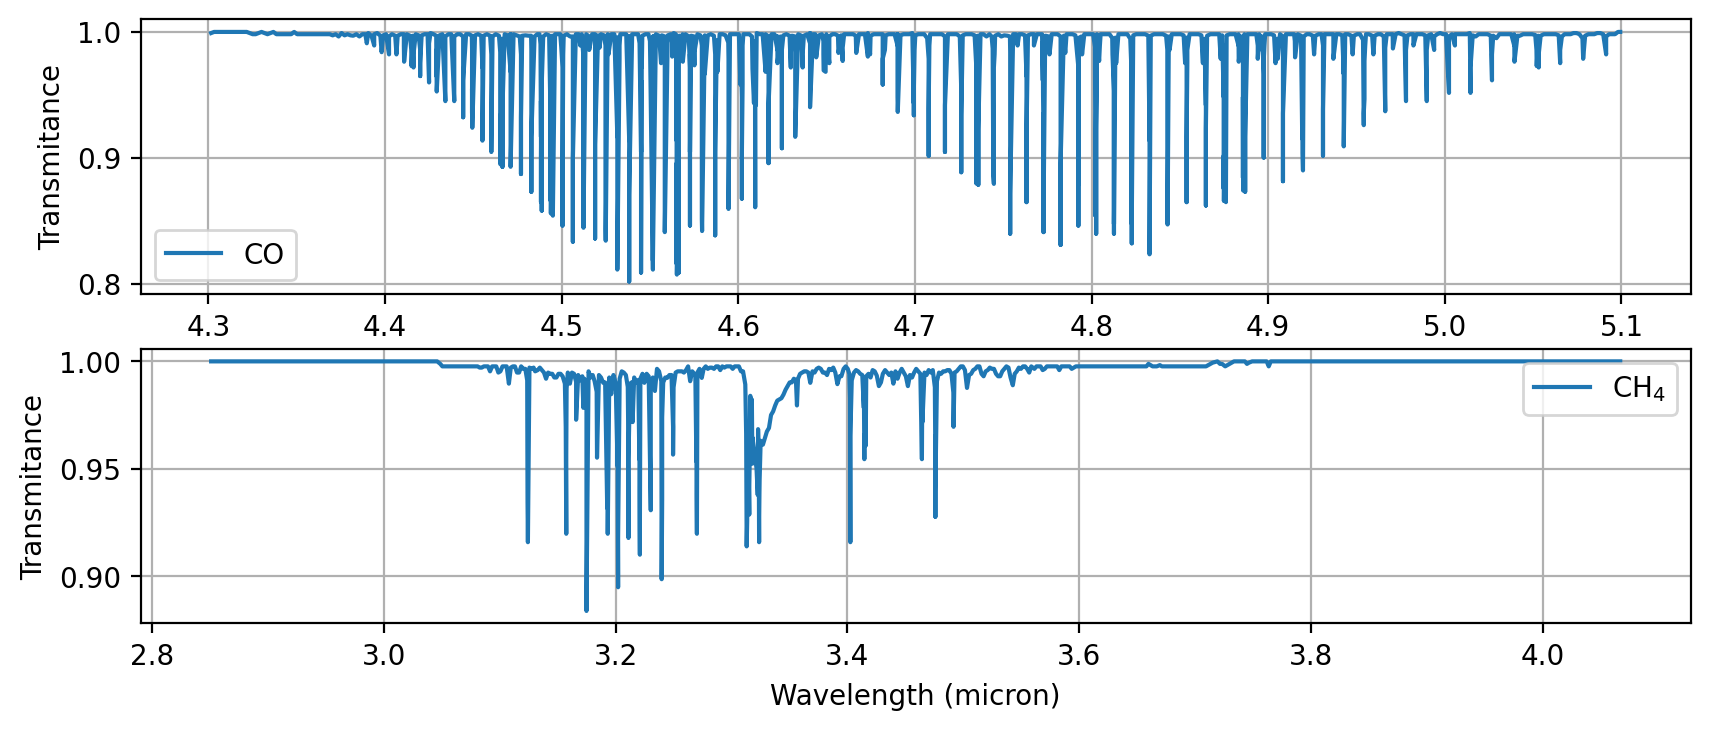

In [6]:
n = 1
# plot two subfigures top and bottom
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,4), dpi=200)
ax1.plot(np.convolve(CO_wvs, np.ones(n)/n, mode='valid'), np.convolve(CO_flux_corrected, np.ones(n)/n, mode='valid'), label="CO")
ax1.legend()
ax1.grid()
ax2.plot(np.convolve(CH4_wvs, np.ones(n)/n, mode='valid'), np.convolve(CH4_flux_corrected, np.ones(n)/n, mode='valid'), label=r"CH$_4$")
ax2.legend()
ax2.grid()
ax1.set_ylabel("Transmitance")
ax2.set_ylabel("Transmitance")
ax2.set_xlabel("Wavelength (micron)")
plt.savefig("./plots/CO_CH4.png")
plt.show()